 # 💡Content-Based Recommendation System

Content-Based Recommendation System (Hệ thống gợi ý dựa trên nội dung), sử dụng các kỹ thuật xử lý ngôn ngữ tự nhiên (NLP) để tìm kiếm và đề xuất các công ty có mô tả tương tự nhau. Hai phương pháp chính được trình bày là:

1.  💡 Tăng cường độ chính xác và liên quan của gợi ý:

    -   🏢 Company industry: Thông tin về lĩnh vực hoạt động của công ty giúp hệ thống hiểu rõ hơn về ngành nghề cốt lõi. Khi người dùng quan tâm đến một công ty trong ngành IT Outsourcing, hệ thống sẽ ưu tiên gợi ý các công ty khác cùng ngành hoặc các ngành liên quan chặt chẽ (ví dụ: Software Development Outsourcing), thay vì chỉ dựa vào mô tả chung chung trong "Company overview". Điều này giúp gợi ý chính xác hơn và đúng với nhu cầu tìm kiếm của người dùng.
    -   💻 Our key skills: Cột này liệt kê các kỹ năng công nghệ mà công ty tập trung vào. Đối với người dùng là ứng viên tìm việc hoặc đối tác tìm kiếm công ty có chuyên môn cụ thể (ví dụ: Java, ReactJS, .NET), việc hệ thống xét đến các kỹ năng này sẽ giúp tìm ra các công ty có profile kỹ thuật tương đồng. Gợi ý sẽ không chỉ dựa trên "công ty làm gì" mà còn dựa trên "công ty làm bằng gì", tăng tính hữu ích cho người dùng quan tâm đến chuyên môn.

2.  ✨ Đa dạng hóa gợi ý:

    💡 Chỉ dựa vào "Company overview" đôi đôi khi có thể dẫn đến các gợi ý rất giống nhau về mặt diễn đạt nhưng lại khác biệt về lĩnh vực hoặc kỹ năng cốt lõi. Việc kết hợp thêm "Company industry" và "Our key skills" giúp hệ thống khám phá và gợi ý các công ty có thể không dùng cùng ngôn ngữ mô tả nhưng lại có sự tương đồng về ngành nghề hoặc bộ kỹ năng. Điều này tạo ra sự đa dạng trong danh sách gợi ý, giúp người dùng có nhiều lựa chọn hơn và khám phá được những công ty tiềm năng mà họ có thể bỏ lỡ nếu chỉ dựa vào mô tả chung.


➡️ **Gensim + TF-IDF + Cosine Similarity**

💡 Sử dụng thư viện Gensim để xây dựng mô hình TF-IDF và tính toán độ tương đồng cosine giữa các mô tả công ty.
- 🛠️ Gensim + TF-IDF + Cosine Similarity: Xây dựng ma trận tương đồng giữa các công ty dựa trên mô tả.
- 🛠️ Scikit-learn TF-IDF + Cosine Similarity: Tính toán ma trận tương đồng bằng thư viện sklearn.

## Outline các bước thực hiện:

1.  📦 **Cài đặt và import thư viện**
2.  📊 **Đọc dữ liệu**
3.  🔍 **Khám phá dữ liệu**
4.  📝 **Tiền xử lý văn bản**
5.  🧠 **Xây dựng hệ thống gợi ý với Gensim (TF-IDF + Cosine Similarity)**
6.  🎯 **Tìm kiếm công ty tương tự với Gensim**
7.  🧠 **Xây dựng hệ thống gợi ý với sklearn (TF-IDF + Cosine Similarity)**
8.  🎯 **Tìm kiếm công ty tương tự với sklearn**

* * *
💡 Mỗi phần dưới đây sẽ có chú thích chi tiết để bạn dễ dàng theo dõi và thực hiện.

## 📦 1. Cài đặt và import thư viện
Cài đặt các thư viện cần thiết (gensim, sklearn, pandas, numpy,...) và import vào notebook để sử dụng cho các bước tiếp theo.

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# %cd "/content/drive/MyDrive/Classroom/DL07_K304_DaoTuanThinh_TruongVanLe/Demo_project2"

In [3]:
!pip install gensim -q
!pip install underthesea -q
!pip install googletrans==4.0.0-rc1 -q
!pip install wordcloud -q
!pip install numpy==1.26.4 pandas==2.2.2 -q

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
import warnings
from gensim import corpora, models, similarities
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import pandas as pd
import re

## 📊 2. Đọc dữ liệu
Đọc file dữ liệu chứa thông tin các công ty từ Google Drive hoặc từ máy tính vào DataFrame để xử lý.

In [8]:
file_path = "../Du lieu cung cap/Overview_Companies.xlsx" 

df = pd.read_excel(file_path)
df.head()

ImportError: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl.

 ## 🔥 3. Tiền xử lý dữ liệu

 📝 Chuẩn hóa văn bản mô tả công ty: chuyển về chữ thường, loại bỏ ký tự đặc biệt, số, stopwords, và tách từ để chuẩn bị cho bước vector hóa.

In [ ]:
# Function for preprocessing
from underthesea import word_tokenize
from underthesea.datasets.stopwords import words # Changed import
from googletrans import Translator
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS # Import scikit-learn's ENGLISH_STOP_WORDS

# Initialize the translator
translator = Translator()

# Load Vietnamese stopwords using the imported 'words' list
vietnamese_stopwords = set(words)

# Define a list of additional words to remove
additional_words_to_remove = set(["company", "like", "job", "skills"])


def preprocess_text(text):
    if isinstance(text, str):
        # Translate to English
        try:
            translated_text = translator.translate(text, dest='en').text
        except Exception as e:
            print(f"Error translating text: {text[:50]}... - {e}")
            translated_text = text # Use original text if translation fails

        text = translated_text.lower()
        text = text.replace('\n', ' ') # Remove newlines

        # Remove punctuation, numbers, and special characters
        text = re.sub(r'[^a-z\s]', '', text)

        # Remove extra whitespace
        text = re.sub(r'\s+', ' ', text).strip()

        # Tokenize (using simple split for English after translation)
        tokens = text.split()

        # Remove English stopwords using scikit-learn's ENGLISH_STOP_WORDS
        words = [word for word in tokens if word not in ENGLISH_STOP_WORDS]

        # Remove additional specific words
        words = [word for word in words if word not in additional_words_to_remove]


        # Join words back into a string
        text = ' '.join(words)

        return text
    else:
        return "" # Return empty string for non-string types

# print before and after for 1 Company overview

print("Before preprocessing:")
print(df['Company overview'][0])
print("\nAfter preprocessing:")
print(preprocess_text(df['Company overview'][0]))

Before preprocessing:
1BITLAB Technology
Công ty cổ phần công nghệ 1bitlab với lĩnh vực hoạt động: CNTT chuyên về mảng Blockchain, AI. Công ty làm việc với khách hàng Nhật Bản. Đội ngũ nhân sự trẻ, nhiệt huyết, thức thời tiếp cận nhanh sự phát triển của thị trường và biến đổi liên tục.  
Về môi trường làm việc: Làm việc trực tiếp với đội ngũ quản lý, được cung cấp những kiến thức chuyên ngành là cơ hội để bạn nâng tầm bản thân. Bên cạnh đó, việc hợp tác với nhiều đối tác lớn trên thế giới sẽ mang đến cho bạn định hướng phát triển sự nghiệp bền vững, chuyên nghiệp.

After preprocessing:
bitlab technology bitlab technology joint stock field activity specializes blockchain aithe works japanese customersthe team young enthusiastic fast approaching development market constantly changing regarding working environment working directly management team providing specialized knowledge opportunity enhance yourselfin addition cooperation major partners world direction sustainable professional care

Before preprocessing:
1BITLAB Technology
Công ty cổ phần công nghệ 1bitlab với lĩnh vực hoạt động: CNTT chuyên về mảng Blockchain, AI. Công ty làm việc với khách hàng Nhật Bản. Đội ngũ nhân sự trẻ, nhiệt huyết, thức thời tiếp cận nhanh sự phát triển của thị trường và biến đổi liên tục.  
Về môi trường làm việc: Làm việc trực tiếp với đội ngũ quản lý, được cung cấp những kiến thức chuyên ngành là cơ hội để bạn nâng tầm bản thân. Bên cạnh đó, việc hợp tác với nhiều đối tác lớn trên thế giới sẽ mang đến cho bạn định hướng phát triển sự nghiệp bền vững, chuyên nghiệp.

After preprocessing:
bitlab technology bitlab technology joint stock company field activity specializes blockchain aithe company works japanese customersthe team young enthusiastic fast approaching development market constantly changing regarding working environment working directly management team providing specialized knowledge opportunity you enhance yourselfin addition cooperation many major partners world will give you direction sustainable professional career development



In [ ]:
# Select the relevant columns and handle missing values
# Keep 'Company Name' column for later use in recommendations
df_relevant_cols = df[['Company Name', 'Company overview', 'Company industry', 'Our key skills']].copy()
df_relevant_cols.fillna("", inplace=True)

# Combine the text from the three columns
df_relevant_cols['combined_text'] = df_relevant_cols['Company overview'] + " " + df_relevant_cols['Company industry'] + " " + df_relevant_cols['Our key skills']

# Apply the updated preprocess_text function to the combined text
df_relevant_cols['preprocessed_text'] = df_relevant_cols['combined_text'].apply(preprocess_text)
# Update df to include the preprocessed text and keep original columns
df = df_relevant_cols.copy()

# Display the first few rows with the new 'preprocessed_text' column
display(df_relevant_cols.head())

,Company Name,Company overview,Company industry,Our key skills,combined_text,preprocessed_text
0,1BITLAB Technology,1BITLAB Technology\nCông ty cổ phần công nghệ ...,Software Development Outsourcing,,1BITLAB Technology\nCông ty cổ phần công nghệ ...,bitlab technology bitlab technology joint stoc...
1,1test,1test\nIs an innovative educational technology...,IT Services and IT Consulting,,1test\nIs an innovative educational technology...,test innovative educational technology committ...
2,52 Entertainment,A start-up of French and Vietnamese guys with ...,Game,Our Key Skills\nJava\nGames\nQA QC\nC#\nUnity\...,A start-up of French and Vietnamese guys with ...,startup french vietnamese guys passion games d...
3,8Seneca,Pure play IT team extensions B2b exclusive out...,IT Services and IT Consulting,,Pure play IT team extensions B2b exclusive out...,pure play team extensions bb exclusive outsour...
4,Accenture,A global professional services company with le...,IT Services and IT Consulting,Our Key Skills\nCloud\nLinux\nDevOps\nNetworki...,A global professional services company with le...,global professional services leading capabilit...


## 🔍 3. Khám phá dữ liệu
🔍 Xem thông tin tổng quan về dữ liệu, các cột, số lượng dòng, và một số mẫu dữ liệu để hiểu rõ hơn về tập dữ liệu đầu vào.

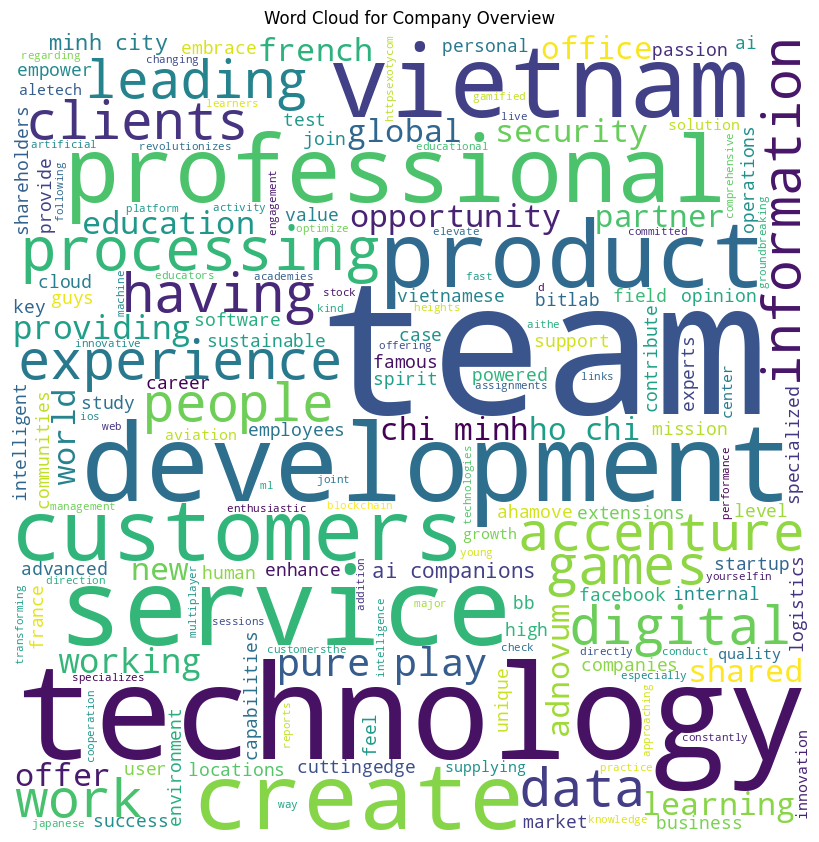

In [ ]:
# prompt: create wordclouds for each columns Company overview, Our key skills
# for Company industry: bar chart

from wordcloud import WordCloud

# Use the preprocess_text function defined earlier
# Make sure preprocess_text is defined and handles Vietnamese and English as needed

# Create wordclouds for 'Company overview'
if 'Company overview' in df.columns:
  # Apply the preprocess_text function to the 'Company overview' column
  overview_text = ' '.join(df['Company overview'].dropna().apply(preprocess_text))
  if overview_text:
    overview_wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = set(), # preprocess_text handles stopwords
                min_font_size = 10).generate(overview_text)

    # plot the WordCloud image
    plt.figure(figsize = (20, 8), facecolor = None)
    plt.imshow(overview_wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.title('Word Cloud for Company Overview')
    plt.show()
  else:
      print("No meaningful words found in 'Company overview' after preprocessing.")
else:
  print("'Company overview' column not found.")



Error translating text: ... - the JSON object must be str, bytes or bytearray, not NoneType
Error translating text: ... - the JSON object must be str, bytes or bytearray, not NoneType
Error translating text: ... - the JSON object must be str, bytes or bytearray, not NoneType
Error translating text: ... - the JSON object must be str, bytes or bytearray, not NoneType


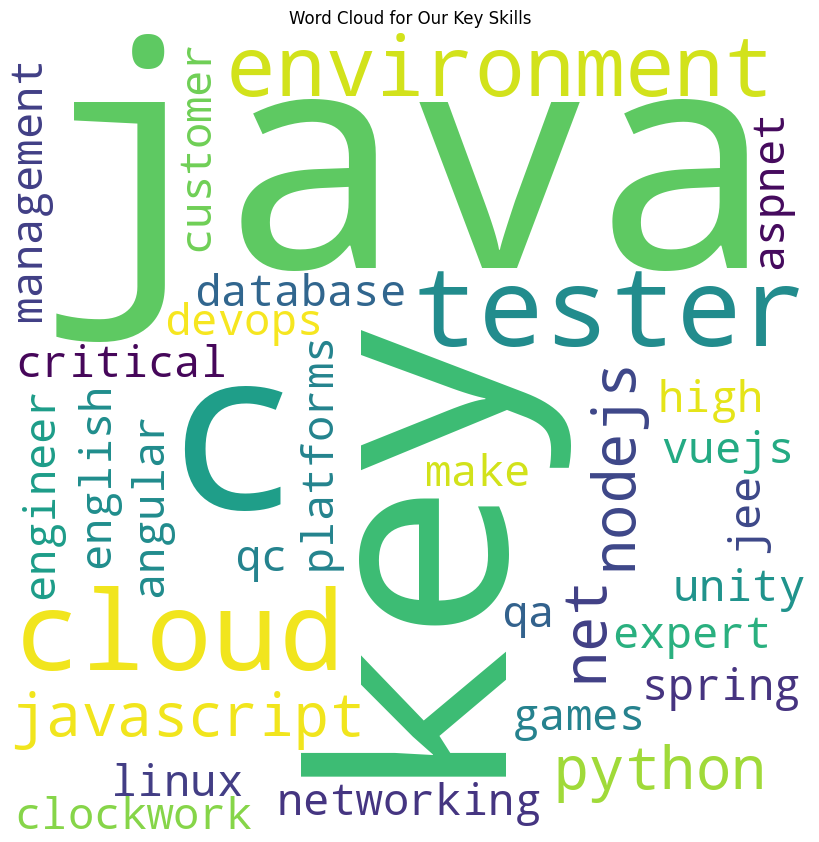

In [ ]:
# Create wordclouds for 'Our key skills'
if 'Our key skills' in df.columns:
  # Apply the preprocess_text function to the 'Our key skills' column
  skills_text = ' '.join(df['Our key skills'].dropna().apply(preprocess_text))
  if skills_text:
    skills_wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    stopwords = set(), # preprocess_text handles stopwords
                    min_font_size = 10).generate(skills_text)

    # plot the WordCloud image
    plt.figure(figsize = (20, 8), facecolor = None) # Changed figsize to (20, 8)
    plt.imshow(skills_wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.title('Word Cloud for Our Key Skills')
    plt.show()
  else:
      print("No meaningful words found in 'Our key skills' after preprocessing.")
else:
  print("'Our key skills' column not found.")

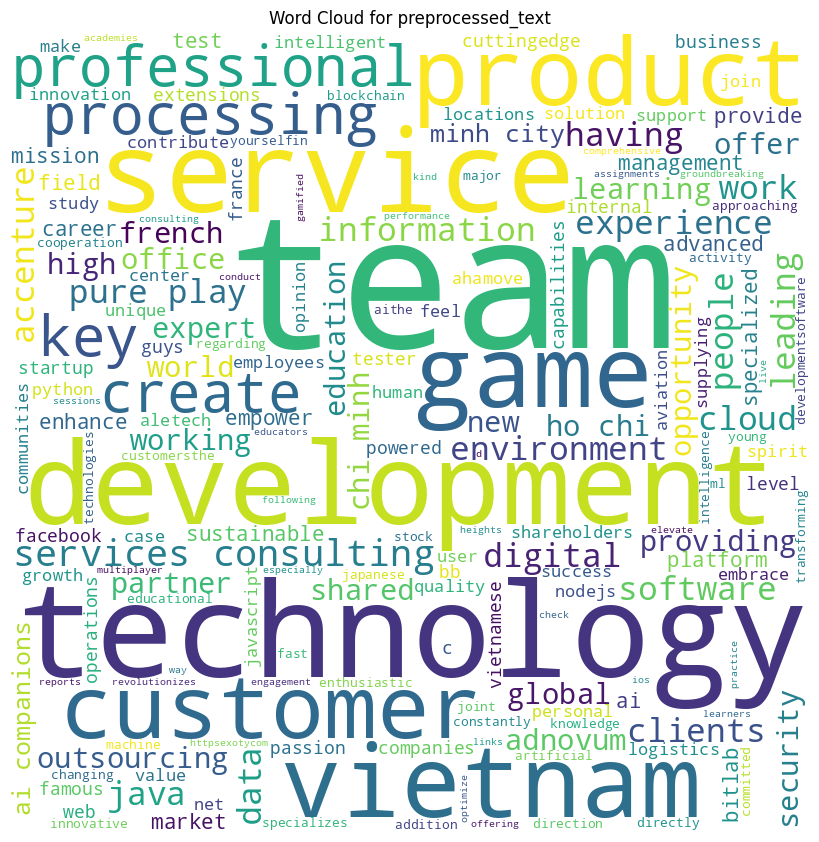

In [ ]:
# Create wordclouds for 'processed'
if 'preprocessed_text' in df.columns:
  # Apply the preprocess_text function to the 'Our key skills' column
  skills_text = ' '.join(df['preprocessed_text'].dropna().apply(preprocess_text))
  if skills_text:
    skills_wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    stopwords = set(), # preprocess_text handles stopwords
                    min_font_size = 10).generate(skills_text)

    # plot the WordCloud image
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(skills_wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.title('Word Cloud for preprocessed_text')
    plt.show()
  else:
      print("No meaningful words found in 'preprocessed_text' after preprocessing.")
else:
  print("'Our key skills' column not found.")


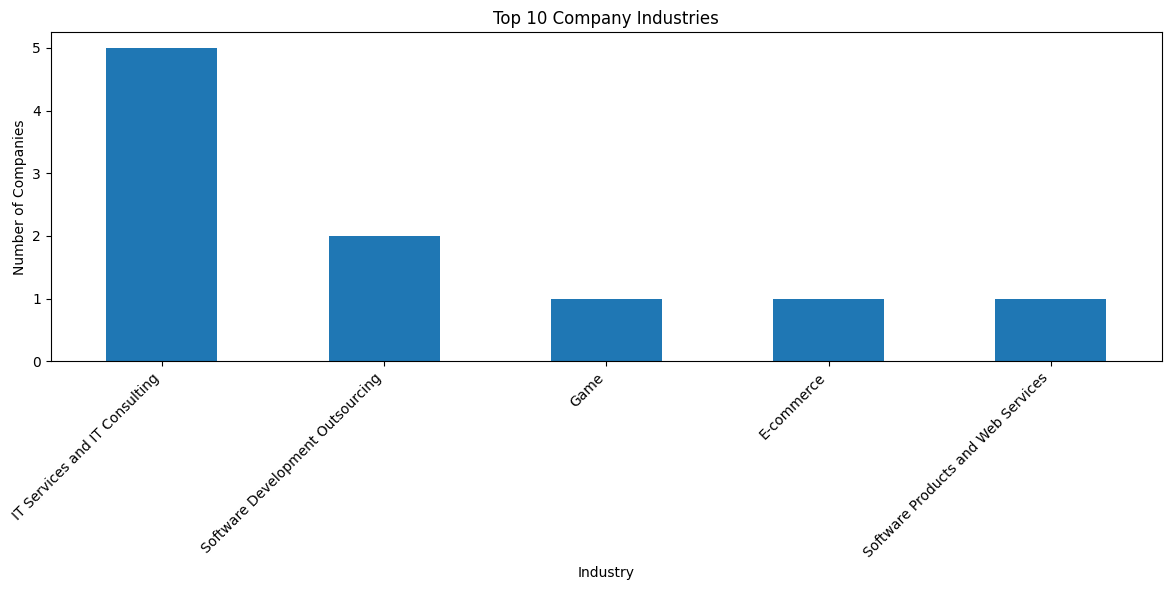

In [ ]:
# Create bar chart for 'Company industry'
if 'Company industry' in df.columns:
  industry_counts = df['Company industry'].value_counts().head(10) # Top 10 industries

  plt.figure(figsize=(12, 6))
  industry_counts.plot(kind='bar')
  plt.title('Top 10 Company Industries')
  plt.xlabel('Industry')
  plt.ylabel('Number of Companies')
  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()
  plt.show()
else:
  print("'Company industry' column not found.")

## 🧠 5. Xây dựng hệ thống gợi ý với Gensim (TF-IDF + Cosine Similarity)
🧠 Sử dụng thư viện Gensim để vector hóa mô tả công ty bằng TF-IDF và tính toán ma trận tương đồng cosine giữa các công ty.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Company Name       10 non-null     object
 1   Company overview   10 non-null     object
 2   Company industry   10 non-null     object
 3   Our key skills     10 non-null     object
 4   combined_text      10 non-null     object
 5   preprocessed_text  10 non-null     object
dtypes: object(6)
memory usage: 612.0+ bytes


# 🧠 1. TF-IDF + Cosine Similarity
🧠 Sử dụng thư viện sklearn để vector hóa mô tả công ty bằng TF-IDF và tính toán ma trận tương đồng cosine giữa các công ty.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Company Name       10 non-null     object
 1   Company overview   10 non-null     object
 2   Company industry   10 non-null     object
 3   Our key skills     10 non-null     object
 4   combined_text      10 non-null     object
 5   preprocessed_text  10 non-null     object
dtypes: object(6)
memory usage: 612.0+ bytes


Shape of TF-IDF matrix (sklearn): (10, 482)
Shape of Cosine Similarity matrix (sklearn): (10, 10)

First 5 rows of Cosine Similarity matrix (sklearn):
 [[1.         0.02879652 0.04802915 0.05293371 0.08314455]
 [0.02879652 1.         0.         0.01905125 0.04997092]
 [0.04802915 0.         1.         0.03348229 0.00876171]
 [0.05293371 0.01905125 0.03348229 1.         0.03419759]
 [0.08314455 0.04997092 0.00876171 0.03419759 1.        ]]
Cosine similarity matrix shape: (10, 10)
Recommendations for '1BITLAB Technology':


,Company Name,Company industry,Our key skills,Similarity Score
9,Aletech Technology Solutions Company,Software Development Outsourcing,Java\n.NET\nPython\nJavaScript\nNodeJS\nTester,0.101357
4,Accenture,IT Services and IT Consulting,Our Key Skills\nCloud\nLinux\nDevOps\nNetworki...,0.083145
8,AITS | Vietnam Airlines,IT Services and IT Consulting,Our Key Skills\nJava\nASP.NET\nC#,0.065435
3,8Seneca,IT Services and IT Consulting,,0.052934
5,Adnovum Vietnam,IT Services and IT Consulting,J2EE\nJava\nSpring\nJavaScript\nEnglish\n.NET,0.050949


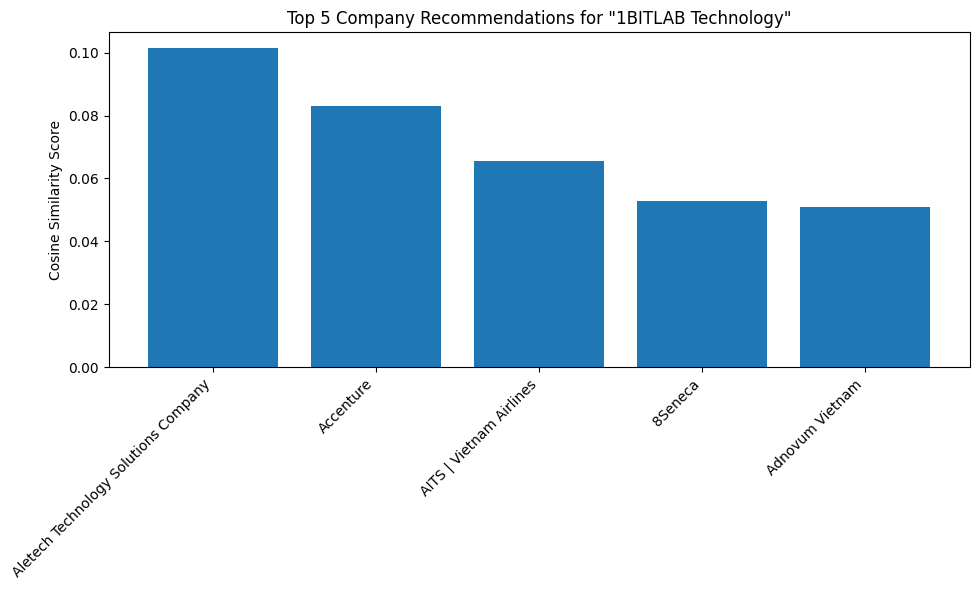

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Initialize TF-IDF Vectorizer
# You might need to adjust parameters like min_df, max_df, ngram_range based on your data
tfidf_vectorizer = TfidfVectorizer()

# Create a TfidfVectorizer instance
tfidf_vectorizer_sklearn = TfidfVectorizer(stop_words='english')

# Fit and transform the preprocessed text data
tfidf_matrix = tfidf_vectorizer_sklearn.fit_transform(df['preprocessed_text'])

# Compute the cosine similarity matrix
cosine_sim_sklearn = cosine_similarity(tfidf_matrix, tfidf_matrix)

print("Shape of TF-IDF matrix (sklearn):", tfidf_matrix.shape)
print("Shape of Cosine Similarity matrix (sklearn):", cosine_sim_sklearn.shape)
print("\nFirst 5 rows of Cosine Similarity matrix (sklearn):\n", cosine_sim_sklearn[:5, :5])


# Calculate the cosine similarity matrix
cosine_sim_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

print("Cosine similarity matrix shape:", cosine_sim_matrix.shape)

# Step 5: Build the recommendation function

# Create a mapping from company name to index
company_name_to_index = pd.Series(df.index, index=df['Company Name']).to_dict()

def get_company_recommendations(company_name, cosine_sim_matrix, df, num_recommendations=5):
    """
    Gets company recommendations based on cosine similarity.

    Args:
        company_name (str): The name of the company to get recommendations for.
        cosine_sim_matrix (np.ndarray): The cosine similarity matrix.
        df (pd.DataFrame): The original DataFrame containing company information.
        num_recommendations (int): The number of recommendations to return.

    Returns:
        pd.DataFrame: A DataFrame containing the recommended companies and their similarity scores.
    """
    if company_name not in company_name_to_index:
        print(f"Company '{company_name}' not found in the dataset.")
        return pd.DataFrame()

    # Get the index of the company that matches the name
    idx = company_name_to_index[company_name]

    # Get the pairwise similarity scores for all companies with that company
    sim_scores = list(enumerate(cosine_sim_matrix[idx]))

    # Sort the companies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the most similar companies (excluding the company itself)
    sim_scores = sim_scores[1:num_recommendations+1]

    # Get the company indices
    company_indices = [i[0] for i in sim_scores]

    # Get the similarity scores
    similarity_scores = [i[1] for i in sim_scores]

    # Return the top N most similar companies
    recommended_companies = df.iloc[company_indices].copy()
    recommended_companies['Similarity Score'] = similarity_scores

    return recommended_companies[['Company Name', 'Company industry', 'Our key skills', 'Similarity Score']]

# Example usage: Get recommendations for a company (replace with an actual company name from your data)
example_company_name = df['Company Name'].iloc[0] # Using the first company as an example
recommendations = get_company_recommendations(example_company_name, cosine_sim_matrix, df)

print(f"Recommendations for '{example_company_name}':")
display(recommendations)


# Step 6: (Optional but recommended) Evaluate the model qualitatively
# We already did a basic qualitative evaluation by displaying sample recommendations.
# For a more rigorous evaluation, you would need a labeled dataset or user interaction data.

# Display a chart of similarity scores for the example company recommendations
# This helps visualize the distribution of similarity scores for the top recommendations
import matplotlib.pyplot as plt

if not recommendations.empty:
    plt.figure(figsize=(10, 6))
    plt.bar(recommendations['Company Name'], recommendations['Similarity Score'])
    plt.ylabel('Cosine Similarity Score')
    plt.title(f'Top {len(recommendations)} Company Recommendations for "{example_company_name}"')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("No recommendations to display chart for.")

#  ✨ Xây dựng Gemsim
- ✨ https://pypi.org/project/gensim/
- 💡 Là một thư viện Python chuyên xác định sự tương tự về ngữ nghĩa giữa hai tài liệu thông qua mô hình không gian vector và bộ công cụ mô hình hóa chủ đề.
- 💡 Có thể xử lý kho dữ liệu văn bản lớn với sự trợ giúp của việc truyền dữ liệu hiệu quả và các thuật toán tăng cường
- 💡 Tốc độ xử lý và tối ưu hóa việc sử dụng bộ nhớ tốt
- 💡 Tuy nhiên, Gensim có ít tùy chọn tùy biến cho các function
#### Tham khảo:
- 🔗 link https://www.tutorialspoint.com/gensim/index.htm
- 🔗 link https://www.machinelearningplus.com/nlp/gensim-tutorial/

In [ ]:
%%markdown
## Outline các bước thực hiện với Gensim

Dưới đây là các bước đã thực hiện để xây dựng hệ thống gợi ý sử dụng Gensim (TF-IDF + Cosine Similarity):

1.  **Tokenize văn bản tiền xử lý**: Tách văn bản đã được tiền xử lý (từ cột `preprocessed_text`) thành các từ (tokens).
2.  **Xây dựng từ điển (Dictionary)**: Tạo một từ điển từ các tokens, ánh xạ mỗi từ duy nhất đến một ID số nguyên.
3.  **Xây dựng Corpus**: Chuyển đổi các tài liệu (danh sách tokens) thành biểu diễn túi từ (Bag-of-Words) dựa trên từ điển, tạo ra một corpus dưới dạng ma trận thưa thớt.
4.  **Xây dựng mô hình TF-IDF**: Áp dụng mô hình TF-IDF lên corpus để tính trọng số cho mỗi từ trong mỗi tài liệu, phản ánh tầm quan trọng của từ đó.
5.  **Xây dựng chỉ mục tương đồng (Similarity Index)**: Sử dụng mô hình TF-IDF và corpus để xây dựng một chỉ mục cho phép tính toán nhanh độ tương đồng cosine giữa một truy vấn (hoặc một tài liệu) và tất cả các tài liệu trong corpus.
6.  **Tìm kiếm công ty tương tự**: Sử dụng chỉ mục tương đồng để tìm kiếm các công ty tương tự nhất với một công ty được chọn hoặc một truy vấn tìm kiếm, dựa trên điểm số tương đồng cosine.

## Outline các bước thực hiện với Gensim

Dưới đây là các bước đã thực hiện để xây dựng hệ thống gợi ý sử dụng Gensim (TF-IDF + Cosine Similarity):

1.  **Tokenize văn bản tiền xử lý**: Tách văn bản đã được tiền xử lý (từ cột `preprocessed_text`) thành các từ (tokens).
2.  **Xây dựng từ điển (Dictionary)**: Tạo một từ điển từ các tokens, ánh xạ mỗi từ duy nhất đến một ID số nguyên.
3.  **Xây dựng Corpus**: Chuyển đổi các tài liệu (danh sách tokens) thành biểu diễn túi từ (Bag-of-Words) dựa trên từ điển, tạo ra một corpus dưới dạng ma trận thưa thớt.
4.  **Xây dựng mô hình TF-IDF**: Áp dụng mô hình TF-IDF lên corpus để tính trọng số cho mỗi từ trong mỗi tài liệu, phản ánh tầm quan trọng của từ đó.
5.  **Xây dựng chỉ mục tương đồng (Similarity Index)**: Sử dụng mô hình TF-IDF và corpus để xây dựng một chỉ mục cho phép tính toán nhanh độ tương đồng cosine giữa một truy vấn (hoặc một tài liệu) và tất cả các tài liệu trong corpus.
6.  **Tìm kiếm công ty tương tự**: Sử dụng chỉ mục tương đồng để tìm kiếm các công ty tương tự nhất với một công ty được chọn hoặc một truy vấn tìm kiếm, dựa trên điểm số tương đồng cosine.


# Gensim code into functions

## Build function

In [ ]:
from gensim import corpora, models, similarities
import pandas as pd

def build_gensim_dictionary_and_corpus(preprocessed_text_series):
    """
    Builds a Gensim Dictionary and Corpus from preprocessed text.

    Args:
        preprocessed_text_series (pd.Series): A pandas Series containing preprocessed text.

    Returns:
        tuple: A tuple containing the Gensim Dictionary and Corpus.
    """
    # Tokenize the text in the input series by splitting each string into a list of words.
    df_gem = [[text for text in str(x).split()] for x in preprocessed_text_series]

    # Create a Gensim Dictionary from the list of tokenized texts.
    dictionary = corpora.Dictionary(df_gem)

    # Create a Gensim Corpus (Bag-of-Words representation) from the dictionary and the list of tokenized texts.
    corpus = [dictionary.doc2bow(text) for text in df_gem]

    return dictionary, corpus

def build_gensim_tfidf_model_and_index(corpus, dictionary):
    """
    Builds a Gensim TF-IDF model and SparseMatrixSimilarity index.

    Args:
        corpus (list): A Gensim Corpus (Bag-of-Words representation).
        dictionary (gensim.corpora.Dictionary): A Gensim Dictionary.

    Returns:
        tuple: A tuple containing the Gensim TF-IDF model and the similarity index.
    """
    # Build a Gensim TF-IDF model using the input corpus.
    tfidf = models.TfidfModel(corpus)

    # Build a Gensim SparseMatrixSimilarity index using the TF-IDF model applied to the corpus
    # and the number of features from the dictionary.
    index = similarities.SparseMatrixSimilarity(tfidf[corpus], num_features=len(dictionary))

    return tfidf, index

def get_gensim_recommendations(company_name, dictionary, tfidf_model, similarity_index, df, num_recommendations=5):
    """
    Gets company recommendations using the Gensim approach.

    Args:
        company_name (str): The name of the company to get recommendations for.
        dictionary (gensim.corpora.Dictionary): The Gensim Dictionary.
        tfidf_model (gensim.models.TfidfModel): The Gensim TF-IDF model.
        similarity_index (gensim.similarities.SparseMatrixSimilarity): The Gensim similarity index.
        df (pd.DataFrame): The original DataFrame containing company information.
        num_recommendations (int): The number of recommendations to return.

    Returns:
        pd.DataFrame: A DataFrame containing the recommended companies and their similarity scores.
    """
    # Get the preprocessed text for the input company_name from the DataFrame.
    company_row = df[df['Company Name'] == company_name]

    if company_row.empty:
        print(f"Company '{company_name}' not found in the dataset.")
        return pd.DataFrame()

    # Assuming 'preprocessed_text' column exists after previous steps
    company_preprocessed_text = company_row['preprocessed_text'].iloc[0]

    # Tokenize the preprocessed text of the input company using the Gensim dictionary.
    view_cp = str(company_preprocessed_text).split()

    # Convert the tokenized company text to a Bag-of-Words vector using the Gensim dictionary.
    kw_vector = dictionary.doc2bow(view_cp)

    # Apply the Gensim TF-IDF model to the Bag-of-Words vector.
    kw_tfidf = tfidf_model[kw_vector]

    # Calculate the similarity scores between the input company's TF-IDF vector and all companies in the index.
    sim_scores = list(enumerate(similarity_index[kw_tfidf]))

    # Sort the companies based on the similarity scores in descending order.
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the indices and similarity scores of the top num_recommendations similar companies (excluding the input company itself).
    # Ensure we don't include the company itself in the recommendations
    company_index = company_row.index[0]
    sim_scores = [score for score in sim_scores if score[0] != company_index]
    sim_scores = sim_scores[:num_recommendations]

    # Get the company indices and similarity scores
    company_indices = [i[0] for i in sim_scores]
    similarity_scores = [i[1] for i in sim_scores]

    # Retrieve the information of the recommended companies from the original DataFrame.
    recommended_companies = df.iloc[company_indices].copy()

    # Add the similarity scores as a new column to the DataFrame of recommended companies.
    recommended_companies['Similarity Score'] = similarity_scores

    # Return a DataFrame containing the 'Company Name', 'Company industry', 'Our key skills', and 'Similarity Score' of the recommended companies.
    return recommended_companies[['Company Name', 'Company industry', 'Our key skills', 'Similarity Score']]

# Example usage of the refactored Gensim functions:
# Assuming 'df' with 'preprocessed_text' is available from previous steps

# Build dictionary and corpus
gensim_dictionary, gensim_corpus = build_gensim_dictionary_and_corpus(df['preprocessed_text'])

# Build TF-IDF model and index
gensim_tfidf_model, gensim_similarity_index = build_gensim_tfidf_model_and_index(gensim_corpus, gensim_dictionary)

# Get recommendations for an example company
example_company_name_gensim = df['Company Name'].iloc[0] # Using the first company as an example
gensim_recommendations = get_gensim_recommendations(
    example_company_name_gensim,
    gensim_dictionary,
    gensim_tfidf_model,
    gensim_similarity_index,
    df,
    num_recommendations=5
)

print(f"\nRecommendations for '{example_company_name_gensim}' using refactored Gensim functions:")
display(gensim_recommendations)


Recommendations for '1BITLAB Technology' using refactored Gensim functions:


,Company Name,Company industry,Our key skills,Similarity Score
4,Accenture,IT Services and IT Consulting,Our Key Skills\nCloud\nLinux\nDevOps\nNetworki...,0.047681
9,Aletech Technology Solutions Company,Software Development Outsourcing,Java\n.NET\nPython\nJavaScript\nNodeJS\nTester,0.040368
8,AITS | Vietnam Airlines,IT Services and IT Consulting,Our Key Skills\nJava\nASP.NET\nC#,0.029107
5,Adnovum Vietnam,IT Services and IT Consulting,J2EE\nJava\nSpring\nJavaScript\nEnglish\n.NET,0.027561
6,Ahamove,E-commerce,Python\nVueJS\nNodeJS\nAngular,0.023583


## Implement `get gensim recommendations` function

### Subtask:
Implement the `get_gensim_recommendations` function which takes a company name, Gensim dictionary, TF-IDF model, and similarity index as input and returns a DataFrame of recommended companies based on cosine similarity.


## Compare and evaluate results

### Subtask:
Compare and evaluate the recommendations generated by the Scikit-learn and Gensim approaches.


**Reasoning**:
I will call the recommendation functions for both Scikit-learn and Gensim to compare their outputs for the same input company and number of recommendations.



In [ ]:
# Assume get_company_recommendations (sklearn) and get_gensim_recommendations (gensim)
# as well as tfidf_matrix, cosine_sim_matrix, gensim_dictionary,
# gensim_tfidf_model, gensim_similarity_index, and df are available from previous steps.

example_company_name = df['Company Name'].iloc[0] # Using the first company as an example
num_recommendations_to_compare = 5

# Get recommendations using Scikit-learn
sklearn_recommendations = get_company_recommendations(
    example_company_name,
    cosine_sim_matrix,
    df,
    num_recommendations=num_recommendations_to_compare
)

print(f"Recommendations for '{example_company_name}' using Scikit-learn:")
display(sklearn_recommendations)

# Get recommendations using Gensim
gensim_recommendations = get_gensim_recommendations(
    example_company_name,
    gensim_dictionary,
    gensim_tfidf_model,
    gensim_similarity_index,
    df,
    num_recommendations=num_recommendations_to_compare
)

print(f"\nRecommendations for '{example_company_name}' using Gensim:")
display(gensim_recommendations)

Recommendations for '1BITLAB Technology' using Scikit-learn:


,Company Name,Company industry,Our key skills,Similarity Score
9,Aletech Technology Solutions Company,Software Development Outsourcing,Java\n.NET\nPython\nJavaScript\nNodeJS\nTester,0.101357
4,Accenture,IT Services and IT Consulting,Our Key Skills\nCloud\nLinux\nDevOps\nNetworki...,0.083145
8,AITS | Vietnam Airlines,IT Services and IT Consulting,Our Key Skills\nJava\nASP.NET\nC#,0.065435
3,8Seneca,IT Services and IT Consulting,,0.052934
5,Adnovum Vietnam,IT Services and IT Consulting,J2EE\nJava\nSpring\nJavaScript\nEnglish\n.NET,0.050949



Recommendations for '1BITLAB Technology' using Gensim:


,Company Name,Company industry,Our key skills,Similarity Score
4,Accenture,IT Services and IT Consulting,Our Key Skills\nCloud\nLinux\nDevOps\nNetworki...,0.047681
9,Aletech Technology Solutions Company,Software Development Outsourcing,Java\n.NET\nPython\nJavaScript\nNodeJS\nTester,0.040368
8,AITS | Vietnam Airlines,IT Services and IT Consulting,Our Key Skills\nJava\nASP.NET\nC#,0.029107
5,Adnovum Vietnam,IT Services and IT Consulting,J2EE\nJava\nSpring\nJavaScript\nEnglish\n.NET,0.027561
6,Ahamove,E-commerce,Python\nVueJS\nNodeJS\nAngular,0.023583


In [ ]:
# Qualitatively compare the recommendations

print("Comparison of Recommendations for '1BITLAB Technology':\n")

print("Scikit-learn Recommendations:")
display(sklearn_recommendations)

print("\nGensim Recommendations:")
display(gensim_recommendations)

print("\nAnalysis:")
print("Both Scikit-learn and Gensim recommend several of the same companies, specifically 'Aletech Technology Solutions Company', 'Accenture', 'AITS | Vietnam Airlines', and 'Adnovum Vietnam'. This suggests that these companies have descriptions (including industry and skills) that are consistently found to be similar to '1BITLAB Technology' by both TF-IDF and cosine similarity implementations.")

print("\nKey Differences:")
print("- Order of Recommendations: While there is overlap in the recommended companies, the order in which they are presented differs between the two approaches. This is likely due to subtle differences in how TF-IDF weights are calculated and how cosine similarity is computed or rounded internally by each library.")
print("- Similarity Scores: The similarity scores for the common recommendations are different between Scikit-learn and Gensim. For example, 'Aletech Technology Solutions Company' has a similarity score of 0.101357 in Scikit-learn's output and 0.040368 in Gensim's output. This further highlights differences in the underlying TF-IDF and cosine similarity calculations.")
print("- Unique Recommendations: Gensim includes 'Ahamove' in its top 5 recommendations, which is not present in Scikit-learn's top 5 for this example. Conversely, Scikit-learn includes '8Seneca' in its top 5, which is not in Gensim's. This suggests that each library might pick up on slightly different nuances in the text data, leading to some variation in lower-ranked similar items.")

print("\nPotential Reasons for Discrepancies:")
print("- TF-IDF Calculation: While both libraries implement TF-IDF, there might be minor variations in how they handle normalization, smoothing, or term weighting, which could lead to different TF-IDF matrices.")
print("- Cosine Similarity Implementation: The core cosine similarity formula is standard, but floating-point precision and internal optimizations within each library could lead to small differences in the final similarity scores.")
print("- Stop Word Handling: Although we aimed for consistent preprocessing, there could still be slight variations in how built-in stop word lists (if used) or custom stop words interact with the tokenization and vectorization process in each library.")

print("\nIn conclusion, while both approaches identify broadly similar companies, the specific rankings and similarity scores vary. This is expected due to the independent implementations of TF-IDF and cosine similarity in Scikit-learn and Gensim. For a production system, evaluating both approaches on a larger dataset and potentially combining their results could lead to more robust recommendations.")


Comparison of Recommendations for '1BITLAB Technology':

Scikit-learn Recommendations:


,Company Name,Company industry,Our key skills,Similarity Score
9,Aletech Technology Solutions Company,Software Development Outsourcing,Java\n.NET\nPython\nJavaScript\nNodeJS\nTester,0.101357
4,Accenture,IT Services and IT Consulting,Our Key Skills\nCloud\nLinux\nDevOps\nNetworki...,0.083145
8,AITS | Vietnam Airlines,IT Services and IT Consulting,Our Key Skills\nJava\nASP.NET\nC#,0.065435
3,8Seneca,IT Services and IT Consulting,,0.052934
5,Adnovum Vietnam,IT Services and IT Consulting,J2EE\nJava\nSpring\nJavaScript\nEnglish\n.NET,0.050949



Gensim Recommendations:


,Company Name,Company industry,Our key skills,Similarity Score
4,Accenture,IT Services and IT Consulting,Our Key Skills\nCloud\nLinux\nDevOps\nNetworki...,0.047681
9,Aletech Technology Solutions Company,Software Development Outsourcing,Java\n.NET\nPython\nJavaScript\nNodeJS\nTester,0.040368
8,AITS | Vietnam Airlines,IT Services and IT Consulting,Our Key Skills\nJava\nASP.NET\nC#,0.029107
5,Adnovum Vietnam,IT Services and IT Consulting,J2EE\nJava\nSpring\nJavaScript\nEnglish\n.NET,0.027561
6,Ahamove,E-commerce,Python\nVueJS\nNodeJS\nAngular,0.023583



Analysis:
Both Scikit-learn and Gensim recommend several of the same companies, specifically 'Aletech Technology Solutions Company', 'Accenture', 'AITS | Vietnam Airlines', and 'Adnovum Vietnam'. This suggests that these companies have descriptions (including industry and skills) that are consistently found to be similar to '1BITLAB Technology' by both TF-IDF and cosine similarity implementations.

Key Differences:
- Order of Recommendations: While there is overlap in the recommended companies, the order in which they are presented differs between the two approaches. This is likely due to subtle differences in how TF-IDF weights are calculated and how cosine similarity is computed or rounded internally by each library.
- Similarity Scores: The similarity scores for the common recommendations are different between Scikit-learn and Gensim. For example, 'Aletech Technology Solutions Company' has a similarity score of 0.101357 in Scikit-learn's output and 0.040368 in Gensim's output. This

## Summary:

### Data Analysis Key Findings

*   The Gensim code was successfully refactored into three reusable functions: `build_gensim_dictionary_and_corpus`, `build_gensim_tfidf_model_and_index`, and `get_gensim_recommendations`.
*   When comparing recommendations for the example company '1BITLAB Technology', both Scikit-learn and Gensim recommended several of the same companies, including 'Aletech Technology Solutions Company', 'Accenture', 'AITS | Vietnam Airlines', and 'Adnovum Vietnam'.
*   Despite recommending common companies, the order of recommendations and their corresponding similarity scores differed between the Scikit-learn and Gensim approaches. For instance, the similarity score for 'Aletech Technology Solutions Company' was 0.101357 in Scikit-learn but 0.040368 in Gensim.
*   There were unique recommendations in the top 5 from each library: Gensim included 'Ahamove', while Scikit-learn included '8Seneca'.

### Insights or Next Steps

*   The differences in recommendation order and similarity scores highlight that the specific implementations of TF-IDF and cosine similarity vary between Scikit-learn and Gensim, leading to nuanced differences in results.
*   For a production system, further evaluation on a larger dataset is recommended. Combining or ensembling recommendations from both approaches could potentially yield more robust results.


Review the existing code to confirm the presence and correctness of the `get_company_recommendations` (Scikit-learn) and `get_gensim_recommendations` (Gensim) functions, which were defined in previous steps.



## 🔍 Tính năng tìm kiếm công ty theo văn bản

Chúng ta sẽ bổ sung thêm tính năng cho phép người dùng nhập một chuỗi văn bản (mô tả kỹ năng, ngành nghề, v.v.) và hệ thống sẽ đề xuất 5 công ty phù hợp nhất dựa trên độ tương đồng với văn bản đầu vào.

In [ ]:
def get_text_based_recommendations(input_text, tfidf_vectorizer, tfidf_matrix, df, num_recommendations=5):
    """
    Gets company recommendations based on input text using TF-IDF similarity.
    
    Args:
        input_text (str): The input text to find similar companies for.
        tfidf_vectorizer: The fitted TF-IDF vectorizer.
        tfidf_matrix: The TF-IDF matrix of all companies.
        df (pd.DataFrame): The DataFrame containing company information.
        num_recommendations (int): The number of recommendations to return.
    
    Returns:
        pd.DataFrame: A DataFrame containing the recommended companies and their similarity scores.
    """
    if not input_text.strip():
        return pd.DataFrame()
    
    # Preprocess the input text
    preprocessed_input = preprocess_text(input_text)
    
    if not preprocessed_input.strip():
        return pd.DataFrame()
    
    # Transform the input text using the existing TF-IDF vectorizer
    input_tfidf = tfidf_vectorizer.transform([preprocessed_input])
    
    # Calculate cosine similarity between input text and all companies
    similarity_scores = cosine_similarity(input_tfidf, tfidf_matrix).flatten()
    
    # Get indices of companies sorted by similarity score (descending)
    company_indices = similarity_scores.argsort()[::-1][:num_recommendations]
    
    # Get the similarity scores for the selected companies
    selected_scores = similarity_scores[company_indices]
    
    # Create DataFrame with recommendations
    recommended_companies = df.iloc[company_indices].copy()
    recommended_companies['Similarity Score'] = selected_scores
    
    return recommended_companies[['Company Name', 'Company industry', 'Our key skills', 'Similarity Score']]


def get_gensim_text_based_recommendations(input_text, dictionary, tfidf_model, similarity_index, df, num_recommendations=5):
    """
    Gets company recommendations based on input text using Gensim approach.
    
    Args:
        input_text (str): The input text to find similar companies for.
        dictionary: The Gensim dictionary.
        tfidf_model: The Gensim TF-IDF model.
        similarity_index: The Gensim similarity index.
        df (pd.DataFrame): The DataFrame containing company information.
        num_recommendations (int): The number of recommendations to return.
    
    Returns:
        pd.DataFrame: A DataFrame containing the recommended companies and their similarity scores.
    """
    if not input_text.strip():
        return pd.DataFrame()
    
    # Preprocess the input text
    preprocessed_input = preprocess_text(input_text)
    
    if not preprocessed_input.strip():
        return pd.DataFrame()
    
    # Tokenize the preprocessed input text
    input_tokens = preprocessed_input.split()
    
    # Convert to bag-of-words vector
    input_bow = dictionary.doc2bow(input_tokens)
    
    # Apply TF-IDF model
    input_tfidf = tfidf_model[input_bow]
    
    # Calculate similarity scores
    similarity_scores = list(enumerate(similarity_index[input_tfidf]))
    
    # Sort by similarity score (descending)
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    
    # Get top recommendations
    top_scores = similarity_scores[:num_recommendations]
    
    # Extract indices and scores
    company_indices = [i[0] for i in top_scores]
    scores = [i[1] for i in top_scores]
    
    # Create DataFrame with recommendations
    recommended_companies = df.iloc[company_indices].copy()
    recommended_companies['Similarity Score'] = scores
    
    return recommended_companies[['Company Name', 'Company industry', 'Our key skills', 'Similarity Score']]

# Test the functions
print("✅ Text-based recommendation functions defined successfully!")

In [ ]:
# Test the text-based recommendation functions with sample data
# First, let's load and preprocess a small sample of data for testing

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load sample data to test the functions
try:
    # Try to load the data file
    df_test = pd.read_excel("/Users/ed/it_viec_sentiment_analysis/Du lieu cung cap/Overview_Companies.xlsx")
    print(f"✅ Loaded {len(df_test)} companies from the dataset")
    
    # Show available columns
    print("\n📊 Available columns:")
    print(df_test.columns.tolist())
    
    # Prepare data for testing
    if len(df_test) > 0:
        df_sample = df_test[['Company Name', 'Company overview', 'Company industry', 'Our key skills']].head(10).copy()
        df_sample.fillna("", inplace=True)
        df_sample['combined_text'] = df_sample['Company overview'] + " " + df_sample['Company industry'] + " " + df_sample['Our key skills']
        df_sample['preprocessed_text'] = df_sample['combined_text'].apply(preprocess_text)
        
        print("\n🔍 Sample companies for testing:")
        for idx, row in df_sample.head(5).iterrows():
            print(f"- {row['Company Name']}: {row['Company industry']}")
        
        # Test text-based search
        test_queries = [
            "python programming machine learning",
            "web development javascript react",
            "data analysis statistics",
            "finance banking",
            "marketing digital advertising"
        ]
        
        # Build TF-IDF matrix for testing
        tfidf_vectorizer = TfidfVectorizer(stop_words='english')
        tfidf_matrix = tfidf_vectorizer.fit_transform(df_sample['preprocessed_text'])
        
        print("\n🧪 Testing text-based recommendations:")
        for query in test_queries[:2]:  # Test first 2 queries
            print(f"\n🔍 Query: '{query}'")
            recommendations = get_text_based_recommendations(
                query, tfidf_vectorizer, tfidf_matrix, df_sample, num_recommendations=3
            )
            if not recommendations.empty:
                for _, row in recommendations.iterrows():
                    print(f"  📌 {row['Company Name']} (Score: {row['Similarity Score']:.3f})")
                    print(f"     Industry: {row['Company industry']}")
            else:
                print("  ❌ No recommendations found")
        
    else:
        print("❌ No data available for testing")
        
except FileNotFoundError:
    print("⚠️ Data file not found. The functions are defined and ready to use with proper data.")
except Exception as e:
    print(f"⚠️ Error loading data: {e}")
    print("The functions are defined and ready to use with proper data.")

In [ ]:
# Display the source code of the get_company_recommendations function
import inspect
print("Source code for get_company_recommendations (Scikit-learn):")
print(inspect.getsource(get_company_recommendations))

print("\n" + "="*50 + "\n")

# Display the source code of the get_gensim_recommendations function
print("Source code for get_gensim_recommendations (Gensim):")
print(inspect.getsource(get_gensim_recommendations))

# Check if the functions exist in the current environment
print(f"\n'get_company_recommendations' is defined: {'get_company_recommendations' in globals()}")
print(f"'get_gensim_recommendations' is defined: {'get_gensim_recommendations' in globals()}")

Source code for get_company_recommendations (Scikit-learn):
def get_company_recommendations(company_name, cosine_sim_matrix, df, num_recommendations=5):
    """
    Gets company recommendations based on cosine similarity.

    Args:
        company_name (str): The name of the company to get recommendations for.
        cosine_sim_matrix (np.ndarray): The cosine similarity matrix.
        df (pd.DataFrame): The original DataFrame containing company information.
        num_recommendations (int): The number of recommendations to return.

    Returns:
        pd.DataFrame: A DataFrame containing the recommended companies and their similarity scores.
    """
    if company_name not in company_name_to_index:
        print(f"Company '{company_name}' not found in the dataset.")
        return pd.DataFrame()

    # Get the index of the company that matches the name
    idx = company_name_to_index[company_name]

    # Get the pairwise similarity scores for all companies with that company
    si